In [15]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from photutils.segmentation import deblend_sources
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [16]:
#Abrimos los datos de los fits
img_b = fits.open('Img_B.fits')[0].data
img_v = fits.open('Img_V.fits')[0].data
hdr_b = fits.open('Img_B.fits')[0].header
hdr_v = fits.open('Img_V.fits')[0].header

In [26]:
#Threshold para detectar fuentes
threshold_b = detect_threshold(img_b, nsigma = 2)
threshold_v = detect_threshold(img_v, nsigma = 2.2)

#Detectamos fuentes
sour_b = detect_sources(img_b, threshold_b, npixels = 328)
sour_v = detect_sources(img_v, threshold_v, npixels = 492)
#Es arreglo de npixeles para que queden iguales la cantidad de fuente
print(sour_b, sour_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 233
labels: [  1   2   3   4   5 ... 229 230 231 232 233] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 233
labels: [  1   2   3   4   5 ... 229 230 231 232 233]


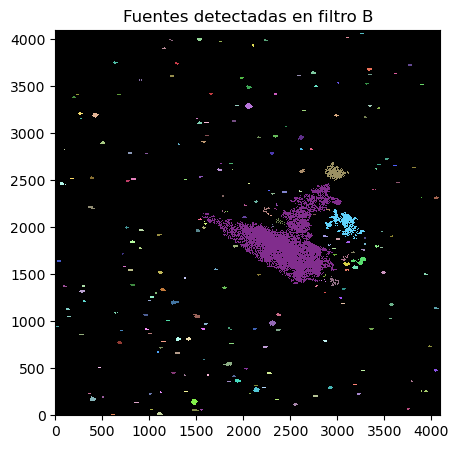

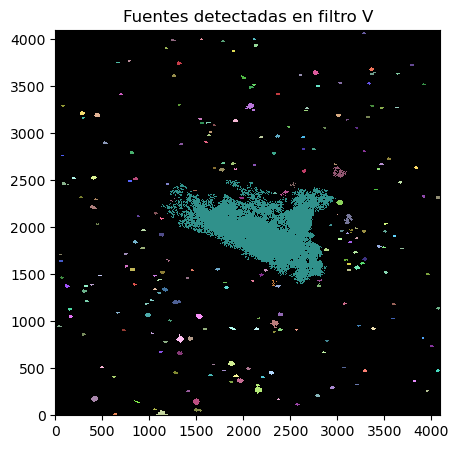

In [27]:
#Mapa de colores
cmap_sour_b = sour_b.make_cmap(seed=123)
cmap_sour_v = sour_v.make_cmap(seed=123)

#Graficamos fuentes
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_b, origin='lower', cmap=cmap_sour_b, interpolation='nearest')
plt.title('Fuentes detectadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_v, origin='lower', cmap=cmap_sour_v, interpolation='nearest')
plt.title('Fuentes detectadas en filtro V')
plt.show()

In [28]:
#Separamos fuentes
from photutils.segmentation import detect_sources, deblend_sources
deblend_b = deblend_sources(img_b, sour_b, npixels=100, nlevels=32, contrast=1)
deblend_v = deblend_sources(img_v, sour_v, npixels=150, nlevels=32, contrast=1)

print(deblend_b, deblend_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 233
labels: [  1   2   3   4   5 ... 229 230 231 232 233] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 233
labels: [  1   2   3   4   5 ... 229 230 231 232 233]


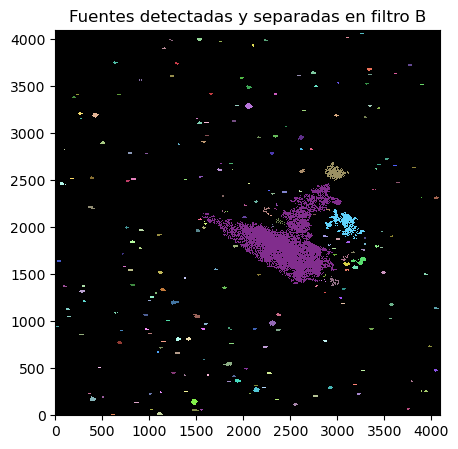

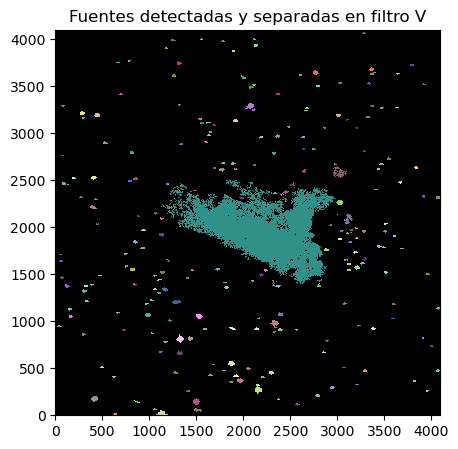

In [29]:
cmap_deblend_b = deblend_b.make_cmap(seed=123)
cmap_deblend_v = deblend_v.make_cmap(seed=123)

#Las vemos

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_b, origin='lower', cmap=cmap_deblend_b,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_v, origin='lower', cmap=cmap_deblend_v,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro V')
plt.show()

In [30]:
#Catalogo
cat_b = SourceCatalog(img_b, deblend_b)
cat_v = SourceCatalog(img_v, deblend_v)
tbl_b = cat_b.to_table()
tbl_v = cat_b.to_table()
print(tbl_b)
print(tbl_v)

label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1  616.7052773213815  5.336263349348918 ...  74535.03138113531          nan
    2 1111.2745941315636  8.150012381732381 ...  497875.3384013374          nan
    3  1482.052279784656  53.57539124699832 ... 361158.31573923986          nan
    4 1026.8684873454483  58.13937711799997 ... 198340.78249479335          nan
    5 1559.8174158379088  55.33963421309263 ...  165692.8370267155          nan
    6   3760.44479377267  62.61718267033068 ... 51073.431665029144          nan
    7 1478.6496412501042  140.3280519124939 ...  805779.4851041771          nan
    8  2553.841090373795   111.740907136606 ... 183499.80344049667          nan
    9  861.4471633797284 131.54521315318638 ... 173808.73342429925          nan
  ...                ...                

In [31]:
#Tablas
tabla_b = cat_b.to_table()['label','xcentroid','ycentroid','area','segment_flux']
tabla_v = cat_v.to_table()['label','xcentroid','ycentroid','area','segment_flux']

#Printeo las tablas con los datos
print(tabla_b, tabla_v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  616.7052773213815  5.336263349348918  477.0 19073.698442459106
    2 1111.2745941315636  8.150012381732381 1714.0 497920.36377334595
    3  1482.052279784656  53.57539124699832 1399.0  72814.09579086304
    4 1026.8684873454483  58.13937711799997  424.0 11321.805627822876
    5 1559.8174158379088  55.33963421309263  465.0 14853.747055053711
    6   3760.44479377267  62.61718267033068  349.0 24957.846446990967
    7 1478.6496412501042  140.3280519124939 3353.0  801388.2493495941
    8  2553.841090373795   111.740907136606  949.0 56281.481704711914
    9  861.4471633797284 131.54521315318638  439.0 12893.689643859863
  ...                ...                ...    ...                ...
  224  640.9633106668493  3748.586705228274  847.0 51367.243492126465
  225 1160.029963825

In [32]:
#Flujo real
tabla_b['segment_flux'] = tabla_b['segment_flux']/hdr_b['EXPTIME']
tabla_v['segment_flux'] = tabla_v['segment_flux']/hdr_v['EXPTIME']

print(tabla_b, tabla_v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  616.7052773213815  5.336263349348918  477.0  635.7899480819702
    2 1111.2745941315636  8.150012381732381 1714.0 16597.345459111533
    3  1482.052279784656  53.57539124699832 1399.0 2427.1365263621014
    4 1026.8684873454483  58.13937711799997  424.0  377.3935209274292
    5 1559.8174158379088  55.33963421309263  465.0  495.1249018351237
    6   3760.44479377267  62.61718267033068  349.0  831.9282148996989
    7 1478.6496412501042  140.3280519124939 3353.0  26712.94164498647
    8  2553.841090373795   111.740907136606  949.0 1876.0493901570637
    9  861.4471633797284 131.54521315318638  439.0  429.7896547953288
  ...                ...                ...    ...                ...
  224  640.9633106668493  3748.586705228274  847.0  1712.241449737549
  225 1160.029963825

In [33]:
#Magnitudes con los zeropoint de la calibracion
zp_b = 39.264197222253934
zp_v = 39.648153131842456

tabla_b['magnitude'] = zp_b - 2.5 * np.log(tabla_b['segment_flux'])
tabla_v['magnitude'] = zp_v - 2.5 * np.log(tabla_v['segment_flux'])
print(tabla_b, tabla_v)

label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1  616.7052773213815 ...  635.7899480819702 23.127026626060175
    2 1111.2745941315636 ... 16597.345459111533 14.971702098614891
    3  1482.052279784656 ... 2427.1365263621014 19.778028579051742
    4 1026.8684873454483 ...  377.3935209274292   24.4309760594209
    5 1559.8174158379088 ...  495.1249018351237 23.752172078055818
    6   3760.44479377267 ...  831.9282148996989  22.45483182992836
    7 1478.6496412501042 ...  26712.94164498647 13.781938640351022
    8  2553.841090373795 ... 1876.0493901570637 20.421888580765323
    9  861.4471633797284 ...  429.7896547953288 24.105957436984053
  ...                ... ...                ...                ...
  224  640.9633106668493 ...  1712.241449737549 20.650300771047508
  225 1160.0299638250694 ...  678.4157279332479 22.96479655207

In [34]:
print(f"Magnitud filtro B: {np.sort(tabla_b['magnitude'])}")
print(f"Magnitud filtro V: {np.sort(tabla_v['magnitude'])}")


Magnitud filtro B:     magnitude     
------------------
 6.436905560149107
12.421700858762673
 12.52830922812094
13.554203907354378
13.781938640351022
14.010591927211063
14.551528426057804
14.647737742304589
14.654356455630996
14.971702098614891
               ...
24.750223067519155
 24.77567926240493
24.785246842759147
24.801674059847258
24.902106773778637
 24.90361615496852
24.975010090304863
  25.0559418253451
 25.11226391289898
 25.16917694584833
Length = 233 rows
Magnitud filtro V:     magnitude     
------------------
 3.668847973199057
10.531735272036826
11.017475586924089
11.445614934556321
 11.60357687447943
11.719172255608981
11.984007619845077
12.137069526106082
12.290734457046913
 12.76034072607569
               ...
 22.21106793421893
22.222770576852895
22.267718891652834
   22.312160946787
 22.44410463975997
22.503544122926023
 22.50528182097384
 22.54244401878869
22.586412278077617
22.903696117233146
Length = 233 rows


In [35]:
B_V = tabla_v['magnitude']-tabla_b['magnitude']

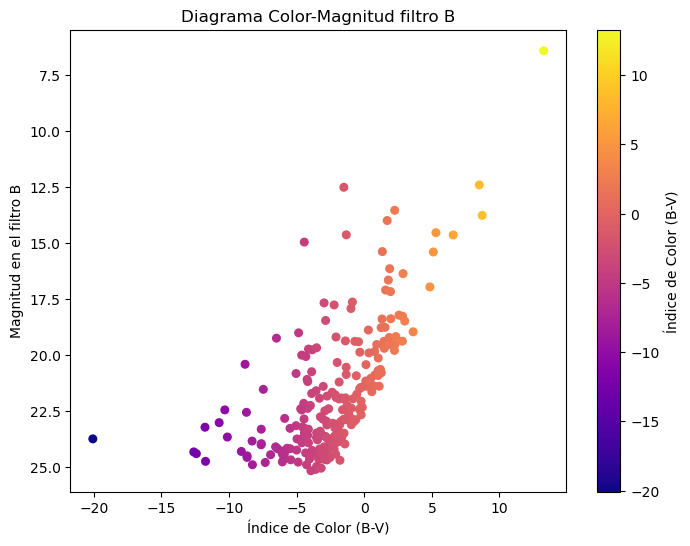

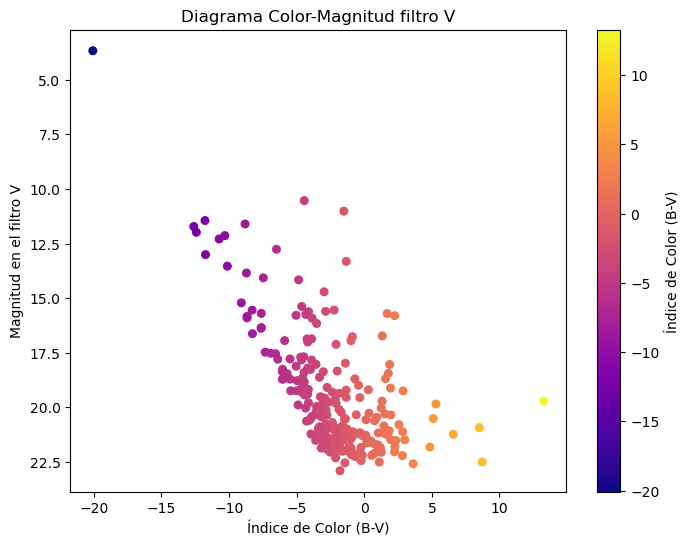

In [36]:
# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tabla_b['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro B")
plt.title("Diagrama Color-Magnitud filtro B")

plt.show()

# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tabla_v['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro V")
plt.title("Diagrama Color-Magnitud filtro V")

plt.show()